In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import datetime
import hashlib
import random
from sklearn.linear_model import MultiTaskLassoCV
%matplotlib inline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import LabelEncoder
import warnings
#warnings.filterwarnings("ignore")

%matplotlib notebook

In [39]:
cassava = pd.read_csv('CassavaImagelinks.csv')
cassava.shape

(135607, 22)

## Cleaning the data frame

In [40]:
#checking for duplicate rows
cassava.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
135602    False
135603    False
135604    False
135605    False
135606    False
Length: 135607, dtype: bool

In [41]:
#removing duplicated rows
cassava.drop_duplicates(inplace=True)
cassava                                   

,_URI,_CREATOR_URI_USER,_CREATION_DATE,_LAST_UPDATE_URI_USER,_LAST_UPDATE_DATE,_MODEL_VERSION,_UI_VERSION,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,...,META_INSTANCE_ID,CASSAVA_DATA_START_TIME,CASSAVA_DATA_CASSAVA_COMMENT,CASSAVA_DATA_CASSAVA_IMAGE_GPS_ALT,CASSAVA_DATA_PHONE_ID,CASSAVA_DATA_CASSAVA_IMAGE_GPS_LNG,CASSAVA_DATA_CASSAVA_IMAGE_GPS_LAT,CASSAVA_DATA_SUBMISSION_TIME,CASSAVA_DATA_CASSAVA_IMAGE_GPS_ACC,IMAGE_LINK
0,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,anonymousUser,2019-09-23 00:37:16.450000,NaN,2019-09-23 00:37:16.450000,NaN,NaN,1,2019-09-23 00:37:16.443000,2019-09-23 00:37:16.443000,...,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,2019-09-23 00:35:35.839000,Necrosis,0.000000,NaN,32.598598,0.424174,2019-09-23 00:00:00,2500.000,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:e235fa16-536d-4e2b-a463-95d32407f852,anonymousUser,2019-09-23 13:08:04.458000,NaN,2019-09-23 13:08:04.458000,NaN,NaN,1,2019-09-23 13:08:04.451000,2019-09-23 13:08:04.451000,...,uuid:e235fa16-536d-4e2b-a463-95d32407f852,2019-09-23 12:18:46.768000,This plant was planted when it was sick,0.000000,3.582461e+14,32.624897,0.521737,2019-09-23 00:00:00,92.900,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,anonymousUser,2019-09-23 13:08:21.196000,NaN,2019-09-23 13:08:21.196000,NaN,NaN,1,2019-09-23 13:08:21.189000,2019-09-23 13:08:21.189000,...,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,2019-09-23 12:30:24.263000,Yellow ish leaves,1137.299927,3.582461e+14,32.625339,0.521473,2019-09-23 00:00:00,7.300,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:0ff8ad92-8d31-45e9-8b16-7010939e5f96,anonymousUser,2019-09-23 13:08:26.384000,NaN,2019-09-23 13:08:26.384000,NaN,NaN,1,2019-09-23 13:08:26.377000,2019-09-23 13:08:26.377000,...,uuid:0ff8ad92-8d31-45e9-8b16-7010939e5f96,2019-09-23 12:20:31.875000,Healthy,1134.400000,3.582461e+14,32.625272,0.521453,2019-09-23 00:00:00,4.992,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:47ed731b-98e7-426e-a2f0-138b1e0ddb48,anonymousUser,2019-09-23 13:08:37.028000,NaN,2019-09-23 13:08:37.028000,NaN,NaN,1,2019-09-23 13:08:37.012000,2019-09-23 13:08:37.012000,...,uuid:47ed731b-98e7-426e-a2f0-138b1e0ddb48,2019-09-23 12:22:36.600000,Clean cassava tuber,1147.500000,3.582461e+14,32.625380,0.521361,2019-09-23 00:00:00,4.320,http://3.19.236.194:8080/ODKAggregate/view/bin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135602,uuid:87d9de62-de01-4470-937d-57035d14e9f3,anonymousUser,2020-06-30 04:09:25.013000,NaN,2020-06-30 04:09:25.013000,NaN,NaN,0,2020-06-30 04:09:24.999000,NaN,...,uuid:87d9de62-de01-4470-937d-57035d14e9f3,2020-06-26 09:54:05.501000,NaN,1118.500000,3.582461e+14,33.649752,2.043023,2020-06-26 00:00:00,4.940,http://3.19.236.194:8080/ODKAggregate/view/bin...
135603,uuid:94ffe6af-0d96-4305-bb08-6a1255777f8e,anonymousUser,2020-06-30 04:09:25.807000,NaN,2020-06-30 04:09:25.807000,NaN,NaN,0,2020-06-30 04:09:25.801000,NaN,...,uuid:94ffe6af-0d96-4305-bb08-6a1255777f8e,2020-06-26 09:56:58.989000,NaN,1118.700000,3.582461e+14,33.649744,2.043025,2020-06-26 00:00:00,4.150,http://3.19.236.194:8080/ODKAggregate/view/bin...
135604,uuid:5b6dac9b-ad53-46d7-989b-9cc21422650c,anonymousUser,2020-06-30 04:09:26.606000,NaN,2020-06-30 04:09:26.606000,NaN,NaN,0,2020-06-30 04:09:26.592000,NaN,...,uuid:5b6dac9b-ad53-46d7-989b-9cc21422650c,2020-06-26 09:57:23.987000,NaN,1118.300000,3.582461e+14,33.649717,2.042974,2020-06-26 00:00:00,4.240,http://3.19.236.194:8080/ODKAggregate/view/bin...
135605,uuid:fd0c81d0-c785-4151-a034-e7ac6885a65c,anonymousUser,2020-06-30 04:09:27.389000,NaN,2020-06-30 04:09:27.389000,NaN,NaN,0,2020-06-30 04:09:27.383000,NaN,...,uuid:fd0c81d0-c785-4151-a034-e7ac6885a65c,2020-06-26 09:57:50.049000,NaN,1118.500000,3.582461e+14,33.649718,2.042978,2020-06-26 00:00:00,4.100,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [42]:
#checking for duplicate rows
cassava.duplicated().sum()     #result: There were no duplicated rows

0

In [43]:
#checking for number of missing values in each column
cassava.isnull().sum()

_URI                                       0
_CREATOR_URI_USER                          0
_CREATION_DATE                             0
_LAST_UPDATE_URI_USER                 133711
_LAST_UPDATE_DATE                          0
_MODEL_VERSION                        135607
_UI_VERSION                           135607
_IS_COMPLETE                               0
_SUBMISSION_DATE                           0
_MARKED_AS_COMPLETE_DATE               35700
CASSAVA_DATA_END_TIME                      2
CASSAVA_DATA_CASSAVA_IMAGE_CLASS           0
META_INSTANCE_ID                           0
CASSAVA_DATA_START_TIME                    0
CASSAVA_DATA_CASSAVA_COMMENT           62919
CASSAVA_DATA_CASSAVA_IMAGE_GPS_ALT         2
CASSAVA_DATA_PHONE_ID                     71
CASSAVA_DATA_CASSAVA_IMAGE_GPS_LNG         2
CASSAVA_DATA_CASSAVA_IMAGE_GPS_LAT         2
CASSAVA_DATA_SUBMISSION_TIME               0
CASSAVA_DATA_CASSAVA_IMAGE_GPS_ACC         2
IMAGE_LINK                                 0
dtype: int

In [44]:
#replacing NaN values in the chosen columns
#Columns with object datatype were replaced with an empty string
#Columns with a float datatype were replaced with a zero

cassava['_LAST_UPDATE_URI_USER'].fillna("", inplace=True)
cassava['_MODEL_VERSION'].fillna(0, inplace=True)
cassava['_UI_VERSION'].fillna(0, inplace=True)
cassava['CASSAVA_DATA_CASSAVA_COMMENT'].fillna("", inplace=True)
cassava

,_URI,_CREATOR_URI_USER,_CREATION_DATE,_LAST_UPDATE_URI_USER,_LAST_UPDATE_DATE,_MODEL_VERSION,_UI_VERSION,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,...,META_INSTANCE_ID,CASSAVA_DATA_START_TIME,CASSAVA_DATA_CASSAVA_COMMENT,CASSAVA_DATA_CASSAVA_IMAGE_GPS_ALT,CASSAVA_DATA_PHONE_ID,CASSAVA_DATA_CASSAVA_IMAGE_GPS_LNG,CASSAVA_DATA_CASSAVA_IMAGE_GPS_LAT,CASSAVA_DATA_SUBMISSION_TIME,CASSAVA_DATA_CASSAVA_IMAGE_GPS_ACC,IMAGE_LINK
0,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,anonymousUser,2019-09-23 00:37:16.450000,,2019-09-23 00:37:16.450000,0.0,0.0,1,2019-09-23 00:37:16.443000,2019-09-23 00:37:16.443000,...,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,2019-09-23 00:35:35.839000,Necrosis,0.000000,NaN,32.598598,0.424174,2019-09-23 00:00:00,2500.000,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:e235fa16-536d-4e2b-a463-95d32407f852,anonymousUser,2019-09-23 13:08:04.458000,,2019-09-23 13:08:04.458000,0.0,0.0,1,2019-09-23 13:08:04.451000,2019-09-23 13:08:04.451000,...,uuid:e235fa16-536d-4e2b-a463-95d32407f852,2019-09-23 12:18:46.768000,This plant was planted when it was sick,0.000000,3.582461e+14,32.624897,0.521737,2019-09-23 00:00:00,92.900,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,anonymousUser,2019-09-23 13:08:21.196000,,2019-09-23 13:08:21.196000,0.0,0.0,1,2019-09-23 13:08:21.189000,2019-09-23 13:08:21.189000,...,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,2019-09-23 12:30:24.263000,Yellow ish leaves,1137.299927,3.582461e+14,32.625339,0.521473,2019-09-23 00:00:00,7.300,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:0ff8ad92-8d31-45e9-8b16-7010939e5f96,anonymousUser,2019-09-23 13:08:26.384000,,2019-09-23 13:08:26.384000,0.0,0.0,1,2019-09-23 13:08:26.377000,2019-09-23 13:08:26.377000,...,uuid:0ff8ad92-8d31-45e9-8b16-7010939e5f96,2019-09-23 12:20:31.875000,Healthy,1134.400000,3.582461e+14,32.625272,0.521453,2019-09-23 00:00:00,4.992,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:47ed731b-98e7-426e-a2f0-138b1e0ddb48,anonymousUser,2019-09-23 13:08:37.028000,,2019-09-23 13:08:37.028000,0.0,0.0,1,2019-09-23 13:08:37.012000,2019-09-23 13:08:37.012000,...,uuid:47ed731b-98e7-426e-a2f0-138b1e0ddb48,2019-09-23 12:22:36.600000,Clean cassava tuber,1147.500000,3.582461e+14,32.625380,0.521361,2019-09-23 00:00:00,4.320,http://3.19.236.194:8080/ODKAggregate/view/bin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135602,uuid:87d9de62-de01-4470-937d-57035d14e9f3,anonymousUser,2020-06-30 04:09:25.013000,,2020-06-30 04:09:25.013000,0.0,0.0,0,2020-06-30 04:09:24.999000,NaN,...,uuid:87d9de62-de01-4470-937d-57035d14e9f3,2020-06-26 09:54:05.501000,,1118.500000,3.582461e+14,33.649752,2.043023,2020-06-26 00:00:00,4.940,http://3.19.236.194:8080/ODKAggregate/view/bin...
135603,uuid:94ffe6af-0d96-4305-bb08-6a1255777f8e,anonymousUser,2020-06-30 04:09:25.807000,,2020-06-30 04:09:25.807000,0.0,0.0,0,2020-06-30 04:09:25.801000,NaN,...,uuid:94ffe6af-0d96-4305-bb08-6a1255777f8e,2020-06-26 09:56:58.989000,,1118.700000,3.582461e+14,33.649744,2.043025,2020-06-26 00:00:00,4.150,http://3.19.236.194:8080/ODKAggregate/view/bin...
135604,uuid:5b6dac9b-ad53-46d7-989b-9cc21422650c,anonymousUser,2020-06-30 04:09:26.606000,,2020-06-30 04:09:26.606000,0.0,0.0,0,2020-06-30 04:09:26.592000,NaN,...,uuid:5b6dac9b-ad53-46d7-989b-9cc21422650c,2020-06-26 09:57:23.987000,,1118.300000,3.582461e+14,33.649717,2.042974,2020-06-26 00:00:00,4.240,http://3.19.236.194:8080/ODKAggregate/view/bin...
135605,uuid:fd0c81d0-c785-4151-a034-e7ac6885a65c,anonymousUser,2020-06-30 04:09:27.389000,,2020-06-30 04:09:27.389000,0.0,0.0,0,2020-06-30 04:09:27.383000,NaN,...,uuid:fd0c81d0-c785-4151-a034-e7ac6885a65c,2020-06-26 09:57:50.049000,,1118.500000,3.582461e+14,33.649718,2.042978,2020-06-26 00:00:00,4.100,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [46]:
#treat spaces as null values
#parse the dates
cassava = pd.read_csv('CassavaImagelinks.csv', na_values=['',' '], parse_dates=["_CREATION_DATE","_LAST_UPDATE_DATE","_MARKED_AS_COMPLETE_DATE","_SUBMISSION_DATE"])
cassava

,_URI,_CREATOR_URI_USER,_CREATION_DATE,_LAST_UPDATE_URI_USER,_LAST_UPDATE_DATE,_MODEL_VERSION,_UI_VERSION,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,...,META_INSTANCE_ID,CASSAVA_DATA_START_TIME,CASSAVA_DATA_CASSAVA_COMMENT,CASSAVA_DATA_CASSAVA_IMAGE_GPS_ALT,CASSAVA_DATA_PHONE_ID,CASSAVA_DATA_CASSAVA_IMAGE_GPS_LNG,CASSAVA_DATA_CASSAVA_IMAGE_GPS_LAT,CASSAVA_DATA_SUBMISSION_TIME,CASSAVA_DATA_CASSAVA_IMAGE_GPS_ACC,IMAGE_LINK
0,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,anonymousUser,2019-09-23 00:37:16.450,NaN,2019-09-23 00:37:16.450,NaN,NaN,1,2019-09-23 00:37:16.443,2019-09-23 00:37:16.443,...,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,2019-09-23 00:35:35.839000,Necrosis,0.000000,NaN,32.598598,0.424174,2019-09-23 00:00:00,2500.000,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:e235fa16-536d-4e2b-a463-95d32407f852,anonymousUser,2019-09-23 13:08:04.458,NaN,2019-09-23 13:08:04.458,NaN,NaN,1,2019-09-23 13:08:04.451,2019-09-23 13:08:04.451,...,uuid:e235fa16-536d-4e2b-a463-95d32407f852,2019-09-23 12:18:46.768000,This plant was planted when it was sick,0.000000,3.582461e+14,32.624897,0.521737,2019-09-23 00:00:00,92.900,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,anonymousUser,2019-09-23 13:08:21.196,NaN,2019-09-23 13:08:21.196,NaN,NaN,1,2019-09-23 13:08:21.189,2019-09-23 13:08:21.189,...,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,2019-09-23 12:30:24.263000,Yellow ish leaves,1137.299927,3.582461e+14,32.625339,0.521473,2019-09-23 00:00:00,7.300,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:0ff8ad92-8d31-45e9-8b16-7010939e5f96,anonymousUser,2019-09-23 13:08:26.384,NaN,2019-09-23 13:08:26.384,NaN,NaN,1,2019-09-23 13:08:26.377,2019-09-23 13:08:26.377,...,uuid:0ff8ad92-8d31-45e9-8b16-7010939e5f96,2019-09-23 12:20:31.875000,Healthy,1134.400000,3.582461e+14,32.625272,0.521453,2019-09-23 00:00:00,4.992,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:47ed731b-98e7-426e-a2f0-138b1e0ddb48,anonymousUser,2019-09-23 13:08:37.028,NaN,2019-09-23 13:08:37.028,NaN,NaN,1,2019-09-23 13:08:37.012,2019-09-23 13:08:37.012,...,uuid:47ed731b-98e7-426e-a2f0-138b1e0ddb48,2019-09-23 12:22:36.600000,Clean cassava tuber,1147.500000,3.582461e+14,32.625380,0.521361,2019-09-23 00:00:00,4.320,http://3.19.236.194:8080/ODKAggregate/view/bin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135602,uuid:87d9de62-de01-4470-937d-57035d14e9f3,anonymousUser,2020-06-30 04:09:25.013,NaN,2020-06-30 04:09:25.013,NaN,NaN,0,2020-06-30 04:09:24.999,NaT,...,uuid:87d9de62-de01-4470-937d-57035d14e9f3,2020-06-26 09:54:05.501000,NaN,1118.500000,3.582461e+14,33.649752,2.043023,2020-06-26 00:00:00,4.940,http://3.19.236.194:8080/ODKAggregate/view/bin...
135603,uuid:94ffe6af-0d96-4305-bb08-6a1255777f8e,anonymousUser,2020-06-30 04:09:25.807,NaN,2020-06-30 04:09:25.807,NaN,NaN,0,2020-06-30 04:09:25.801,NaT,...,uuid:94ffe6af-0d96-4305-bb08-6a1255777f8e,2020-06-26 09:56:58.989000,NaN,1118.700000,3.582461e+14,33.649744,2.043025,2020-06-26 00:00:00,4.150,http://3.19.236.194:8080/ODKAggregate/view/bin...
135604,uuid:5b6dac9b-ad53-46d7-989b-9cc21422650c,anonymousUser,2020-06-30 04:09:26.606,NaN,2020-06-30 04:09:26.606,NaN,NaN,0,2020-06-30 04:09:26.592,NaT,...,uuid:5b6dac9b-ad53-46d7-989b-9cc21422650c,2020-06-26 09:57:23.987000,NaN,1118.300000,3.582461e+14,33.649717,2.042974,2020-06-26 00:00:00,4.240,http://3.19.236.194:8080/ODKAggregate/view/bin...
135605,uuid:fd0c81d0-c785-4151-a034-e7ac6885a65c,anonymousUser,2020-06-30 04:09:27.389,NaN,2020-06-30 04:09:27.389,NaN,NaN,0,2020-06-30 04:09:27.383,NaT,...,uuid:fd0c81d0-c785-4151-a034-e7ac6885a65c,2020-06-26 09:57:50.049000,NaN,1118.500000,3.582461e+14,33.649718,2.042978,2020-06-26 00:00:00,4.100,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [47]:
#checking for information about the data
cassava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135607 entries, 0 to 135606
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   _URI                                135607 non-null  object        
 1   _CREATOR_URI_USER                   135607 non-null  object        
 2   _CREATION_DATE                      135607 non-null  datetime64[ns]
 3   _LAST_UPDATE_URI_USER               1896 non-null    object        
 4   _LAST_UPDATE_DATE                   135607 non-null  datetime64[ns]
 5   _MODEL_VERSION                      0 non-null       float64       
 6   _UI_VERSION                         0 non-null       float64       
 7   _IS_COMPLETE                        135607 non-null  int64         
 8   _SUBMISSION_DATE                    135607 non-null  datetime64[ns]
 9   _MARKED_AS_COMPLETE_DATE            99907 non-null   datetime64[ns]
 10  CASSAVA_

In [48]:
cassava.columns

Index(['_URI', '_CREATOR_URI_USER', '_CREATION_DATE', '_LAST_UPDATE_URI_USER',
       '_LAST_UPDATE_DATE', '_MODEL_VERSION', '_UI_VERSION', '_IS_COMPLETE',
       '_SUBMISSION_DATE', '_MARKED_AS_COMPLETE_DATE', 'CASSAVA_DATA_END_TIME',
       'CASSAVA_DATA_CASSAVA_IMAGE_CLASS', 'META_INSTANCE_ID',
       'CASSAVA_DATA_START_TIME', 'CASSAVA_DATA_CASSAVA_COMMENT',
       'CASSAVA_DATA_CASSAVA_IMAGE_GPS_ALT', 'CASSAVA_DATA_PHONE_ID',
       'CASSAVA_DATA_CASSAVA_IMAGE_GPS_LNG',
       'CASSAVA_DATA_CASSAVA_IMAGE_GPS_LAT', 'CASSAVA_DATA_SUBMISSION_TIME',
       'CASSAVA_DATA_CASSAVA_IMAGE_GPS_ACC', 'IMAGE_LINK'],
      dtype='object')

In [49]:
cassava.head()

,_URI,_CREATOR_URI_USER,_CREATION_DATE,_LAST_UPDATE_URI_USER,_LAST_UPDATE_DATE,_MODEL_VERSION,_UI_VERSION,_IS_COMPLETE,_SUBMISSION_DATE,_MARKED_AS_COMPLETE_DATE,...,META_INSTANCE_ID,CASSAVA_DATA_START_TIME,CASSAVA_DATA_CASSAVA_COMMENT,CASSAVA_DATA_CASSAVA_IMAGE_GPS_ALT,CASSAVA_DATA_PHONE_ID,CASSAVA_DATA_CASSAVA_IMAGE_GPS_LNG,CASSAVA_DATA_CASSAVA_IMAGE_GPS_LAT,CASSAVA_DATA_SUBMISSION_TIME,CASSAVA_DATA_CASSAVA_IMAGE_GPS_ACC,IMAGE_LINK
0,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,anonymousUser,2019-09-23 00:37:16.450,NaN,2019-09-23 00:37:16.450,NaN,NaN,1,2019-09-23 00:37:16.443,2019-09-23 00:37:16.443,...,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,2019-09-23 00:35:35.839000,Necrosis,0.000000,NaN,32.598598,0.424174,2019-09-23 00:00:00,2500.000,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:e235fa16-536d-4e2b-a463-95d32407f852,anonymousUser,2019-09-23 13:08:04.458,NaN,2019-09-23 13:08:04.458,NaN,NaN,1,2019-09-23 13:08:04.451,2019-09-23 13:08:04.451,...,uuid:e235fa16-536d-4e2b-a463-95d32407f852,2019-09-23 12:18:46.768000,This plant was planted when it was sick,0.000000,3.582461e+14,32.624897,0.521737,2019-09-23 00:00:00,92.900,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,anonymousUser,2019-09-23 13:08:21.196,NaN,2019-09-23 13:08:21.196,NaN,NaN,1,2019-09-23 13:08:21.189,2019-09-23 13:08:21.189,...,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,2019-09-23 12:30:24.263000,Yellow ish leaves,1137.299927,3.582461e+14,32.625339,0.521473,2019-09-23 00:00:00,7.300,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:0ff8ad92-8d31-45e9-8b16-7010939e5f96,anonymousUser,2019-09-23 13:08:26.384,NaN,2019-09-23 13:08:26.384,NaN,NaN,1,2019-09-23 13:08:26.377,2019-09-23 13:08:26.377,...,uuid:0ff8ad92-8d31-45e9-8b16-7010939e5f96,2019-09-23 12:20:31.875000,Healthy,1134.400000,3.582461e+14,32.625272,0.521453,2019-09-23 00:00:00,4.992,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:47ed731b-98e7-426e-a2f0-138b1e0ddb48,anonymousUser,2019-09-23 13:08:37.028,NaN,2019-09-23 13:08:37.028,NaN,NaN,1,2019-09-23 13:08:37.012,2019-09-23 13:08:37.012,...,uuid:47ed731b-98e7-426e-a2f0-138b1e0ddb48,2019-09-23 12:22:36.600000,Clean cassava tuber,1147.500000,3.582461e+14,32.625380,0.521361,2019-09-23 00:00:00,4.320,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [50]:
#rename the columns so as to easily understand the data
cassava.rename(columns={'_URI':'ID','_CREATOR_URI_USER':'CREATOR_USER_ID','_CREATION_DATE':'CREATION_DATE','_LAST_UPDATE_URI_USER':'LAST_UPDATE_USER_ID',
                        '_LAST_UPDATE_DATE':'LAST_UPDATE_DATE','_MODEL_VERSION':'MODEL_VERSION',
                       '_UI_VERSION':'UI_VERSION','_IS_COMPLETE':'IS_COMPLETE','_SUBMISSION_DATE':'SUBMISSION_DATE',
                       '_MARKED_AS_COMPLETE_DATE':'MARKED_AS_COMPLETE_DATE','CASSAVA_DATA_CASSAVA_IMAGE_CLASS':'CASSAVA_IMAGE_CLASS','CASSAVA_DATA_CASSAVA_COMMENT':'CASSAVA_DATA_COMMENT',
                       'CASSAVA_DATA_PHONE_ID':'CASSAVA_DEVICE_ID','CASSAVA_DATA_CASSAVA_IMAGE_GPS_ALT':'CASSAVA_GPS_ALT','CASSAVA_DATA_CASSAVA_IMAGE_GPS_LNG':'CASSAVA_GPS_LNG',
                       'CASSAVA_DATA_CASSAVA_IMAGE_GPS_LAT':'CASSAVA_GPS_LAT','CASSAVA_DATA_CASSAVA_IMAGE_GPS_ACC':'CASSAVA_GPS_ACC', 'IMAGE_LINK':'CASSAVA_IMAGE_LINK'}, inplace=True)
cassava.head()


,ID,CREATOR_USER_ID,CREATION_DATE,LAST_UPDATE_USER_ID,LAST_UPDATE_DATE,MODEL_VERSION,UI_VERSION,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,...,META_INSTANCE_ID,CASSAVA_DATA_START_TIME,CASSAVA_DATA_COMMENT,CASSAVA_GPS_ALT,CASSAVA_DEVICE_ID,CASSAVA_GPS_LNG,CASSAVA_GPS_LAT,CASSAVA_DATA_SUBMISSION_TIME,CASSAVA_GPS_ACC,CASSAVA_IMAGE_LINK
0,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,anonymousUser,2019-09-23 00:37:16.450,NaN,2019-09-23 00:37:16.450,NaN,NaN,1,2019-09-23 00:37:16.443,2019-09-23 00:37:16.443,...,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,2019-09-23 00:35:35.839000,Necrosis,0.000000,NaN,32.598598,0.424174,2019-09-23 00:00:00,2500.000,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:e235fa16-536d-4e2b-a463-95d32407f852,anonymousUser,2019-09-23 13:08:04.458,NaN,2019-09-23 13:08:04.458,NaN,NaN,1,2019-09-23 13:08:04.451,2019-09-23 13:08:04.451,...,uuid:e235fa16-536d-4e2b-a463-95d32407f852,2019-09-23 12:18:46.768000,This plant was planted when it was sick,0.000000,3.582461e+14,32.624897,0.521737,2019-09-23 00:00:00,92.900,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,anonymousUser,2019-09-23 13:08:21.196,NaN,2019-09-23 13:08:21.196,NaN,NaN,1,2019-09-23 13:08:21.189,2019-09-23 13:08:21.189,...,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,2019-09-23 12:30:24.263000,Yellow ish leaves,1137.299927,3.582461e+14,32.625339,0.521473,2019-09-23 00:00:00,7.300,http://3.19.236.194:8080/ODKAggregate/view/bin...
3,uuid:0ff8ad92-8d31-45e9-8b16-7010939e5f96,anonymousUser,2019-09-23 13:08:26.384,NaN,2019-09-23 13:08:26.384,NaN,NaN,1,2019-09-23 13:08:26.377,2019-09-23 13:08:26.377,...,uuid:0ff8ad92-8d31-45e9-8b16-7010939e5f96,2019-09-23 12:20:31.875000,Healthy,1134.400000,3.582461e+14,32.625272,0.521453,2019-09-23 00:00:00,4.992,http://3.19.236.194:8080/ODKAggregate/view/bin...
4,uuid:47ed731b-98e7-426e-a2f0-138b1e0ddb48,anonymousUser,2019-09-23 13:08:37.028,NaN,2019-09-23 13:08:37.028,NaN,NaN,1,2019-09-23 13:08:37.012,2019-09-23 13:08:37.012,...,uuid:47ed731b-98e7-426e-a2f0-138b1e0ddb48,2019-09-23 12:22:36.600000,Clean cassava tuber,1147.500000,3.582461e+14,32.625380,0.521361,2019-09-23 00:00:00,4.320,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [51]:
#to view new column names
cassava.columns

Index(['ID', 'CREATOR_USER_ID', 'CREATION_DATE', 'LAST_UPDATE_USER_ID',
       'LAST_UPDATE_DATE', 'MODEL_VERSION', 'UI_VERSION', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'CASSAVA_DATA_END_TIME',
       'CASSAVA_IMAGE_CLASS', 'META_INSTANCE_ID', 'CASSAVA_DATA_START_TIME',
       'CASSAVA_DATA_COMMENT', 'CASSAVA_GPS_ALT', 'CASSAVA_DEVICE_ID',
       'CASSAVA_GPS_LNG', 'CASSAVA_GPS_LAT', 'CASSAVA_DATA_SUBMISSION_TIME',
       'CASSAVA_GPS_ACC', 'CASSAVA_IMAGE_LINK'],
      dtype='object')

## Anonymizing sensitive user data (device id column) using the hashing method.

In [52]:
cassava['CASSAVA_DEVICE_ID'] = [hashlib.sha1(str.encode(str(i))).hexdigest() for i in cassava['CASSAVA_DEVICE_ID']]
display(cassava.head(3))

,ID,CREATOR_USER_ID,CREATION_DATE,LAST_UPDATE_USER_ID,LAST_UPDATE_DATE,MODEL_VERSION,UI_VERSION,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,...,META_INSTANCE_ID,CASSAVA_DATA_START_TIME,CASSAVA_DATA_COMMENT,CASSAVA_GPS_ALT,CASSAVA_DEVICE_ID,CASSAVA_GPS_LNG,CASSAVA_GPS_LAT,CASSAVA_DATA_SUBMISSION_TIME,CASSAVA_GPS_ACC,CASSAVA_IMAGE_LINK
0,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,anonymousUser,2019-09-23 00:37:16.450,NaN,2019-09-23 00:37:16.450,NaN,NaN,1,2019-09-23 00:37:16.443,2019-09-23 00:37:16.443,...,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,2019-09-23 00:35:35.839000,Necrosis,0.000000,11e623a37e87cf7995c466723ec99688d55cae8c,32.598598,0.424174,2019-09-23 00:00:00,2500.0,http://3.19.236.194:8080/ODKAggregate/view/bin...
1,uuid:e235fa16-536d-4e2b-a463-95d32407f852,anonymousUser,2019-09-23 13:08:04.458,NaN,2019-09-23 13:08:04.458,NaN,NaN,1,2019-09-23 13:08:04.451,2019-09-23 13:08:04.451,...,uuid:e235fa16-536d-4e2b-a463-95d32407f852,2019-09-23 12:18:46.768000,This plant was planted when it was sick,0.000000,3e5467bcbcb8f58c3652330b411d2c8f977d4e00,32.624897,0.521737,2019-09-23 00:00:00,92.9,http://3.19.236.194:8080/ODKAggregate/view/bin...
2,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,anonymousUser,2019-09-23 13:08:21.196,NaN,2019-09-23 13:08:21.196,NaN,NaN,1,2019-09-23 13:08:21.189,2019-09-23 13:08:21.189,...,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,2019-09-23 12:30:24.263000,Yellow ish leaves,1137.299927,9b5ae6256ef75e52de9b5966f5c540ab49480488,32.625339,0.521473,2019-09-23 00:00:00,7.3,http://3.19.236.194:8080/ODKAggregate/view/bin...


In [15]:
# drop the meta_instance_id column because it has same meaning as the ID/URI column
#cassava.drop('META_INSTANCE_ID', inplace=True, axis=1)
#cassava = cassava.drop('META_INSTANCE_ID', axis=1)
#del cassava['META_INSTANCE_ID']

In [56]:
cassava.columns

Index(['ID', 'CREATOR_USER_ID', 'CREATION_DATE', 'LAST_UPDATE_USER_ID',
       'LAST_UPDATE_DATE', 'MODEL_VERSION', 'UI_VERSION', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'CASSAVA_DATA_END_TIME',
       'CASSAVA_IMAGE_CLASS', 'META_INSTANCE_ID', 'CASSAVA_DATA_START_TIME',
       'CASSAVA_DATA_COMMENT', 'CASSAVA_GPS_ALT', 'CASSAVA_DEVICE_ID',
       'CASSAVA_GPS_LNG', 'CASSAVA_GPS_LAT', 'CASSAVA_DATA_SUBMISSION_TIME',
       'CASSAVA_GPS_ACC', 'CASSAVA_IMAGE_LINK'],
      dtype='object')

## Creating a smaller dataframe that contains only required/relevant columns

In [57]:
#Locate the columns I need
new_cassava = cassava.iloc[:,[0,2,4,7,8,9,10,11,13,14,15,17,18]]
new_cassava.head(3)

,ID,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,CASSAVA_DATA_END_TIME,CASSAVA_IMAGE_CLASS,CASSAVA_DATA_START_TIME,CASSAVA_DATA_COMMENT,CASSAVA_GPS_ALT,CASSAVA_GPS_LNG,CASSAVA_GPS_LAT
0,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,2019-09-23 00:37:16.450,2019-09-23 00:37:16.450,1,2019-09-23 00:37:16.443,2019-09-23 00:37:16.443,2019-09-23 00:36:31.097000,other,2019-09-23 00:35:35.839000,Necrosis,0.000000,32.598598,0.424174
1,uuid:e235fa16-536d-4e2b-a463-95d32407f852,2019-09-23 13:08:04.458,2019-09-23 13:08:04.458,1,2019-09-23 13:08:04.451,2019-09-23 13:08:04.451,2019-09-23 12:21:17.279000,cmd,2019-09-23 12:18:46.768000,This plant was planted when it was sick,0.000000,32.624897,0.521737
2,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,2019-09-23 13:08:21.196,2019-09-23 13:08:21.196,1,2019-09-23 13:08:21.189,2019-09-23 13:08:21.189,2019-09-23 12:38:01.552000,healthy,2019-09-23 12:30:24.263000,Yellow ish leaves,1137.299927,32.625339,0.521473


In [58]:
new_cassava.columns

Index(['ID', 'CREATION_DATE', 'LAST_UPDATE_DATE', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'CASSAVA_DATA_END_TIME',
       'CASSAVA_IMAGE_CLASS', 'CASSAVA_DATA_START_TIME',
       'CASSAVA_DATA_COMMENT', 'CASSAVA_GPS_ALT', 'CASSAVA_GPS_LNG',
       'CASSAVA_GPS_LAT'],
      dtype='object')

In [59]:
new_cassava.head(15).iloc[:,[10,7]]


,CASSAVA_GPS_ALT,CASSAVA_IMAGE_CLASS
0,0.000000,other
1,0.000000,cmd
2,1137.299927,healthy
3,1134.400000,healthy
4,1147.500000,healthy
5,1137.299927,cmd
6,1128.700000,cbb
7,1137.299927,cbb
8,1138.200000,other
9,1138.200000,cbsd


## Grouping the data by different columns


In [60]:
#group by the image class and give me the percentage of valid and invalid images
cassava.groupby('CASSAVA_IMAGE_CLASS').IS_COMPLETE.value_counts(normalize=True)

CASSAVA_IMAGE_CLASS  IS_COMPLETE
cbb                  0              0.781965
                     1              0.218035
cbsd                 1              0.635659
                     0              0.364341
cgm                  1              0.893121
                     0              0.106879
cmd                  1              0.898476
                     0              0.101524
healthy              1              0.718166
                     0              0.281834
other                1              0.722368
                     0              0.277632
Name: IS_COMPLETE, dtype: float64

<IPython.core.display.Javascript object>


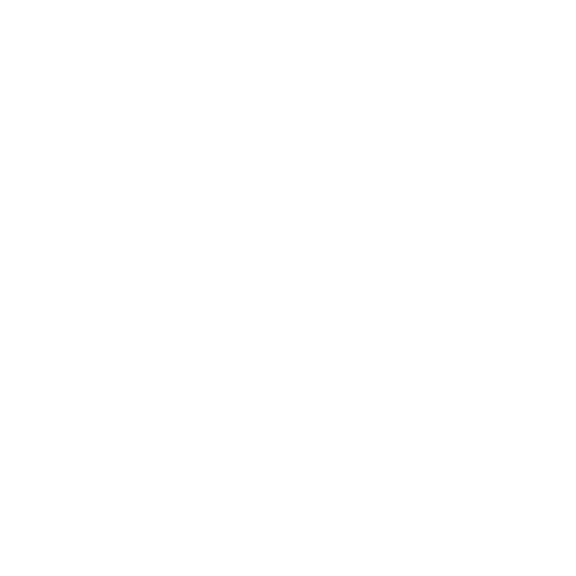

In [21]:
cassava.groupby('CASSAVA_IMAGE_CLASS').IS_COMPLETE.value_counts(normalize=True).plot(kind='barh', subplots=True, figsize=(8, 8)); plt.legend(loc='best')

In [22]:
cassava.groupby(cassava.SUBMISSION_DATE.dt.month).IS_COMPLETE.mean()

SUBMISSION_DATE
1     0.773613
2     0.831479
3     0.760135
4     0.995102
5     0.438343
6     0.748522
9     0.624357
10    0.456809
11    0.661353
12    0.677132
Name: IS_COMPLETE, dtype: float64

In [23]:
cassava.groupby(cassava.SUBMISSION_DATE.dt.month).IS_COMPLETE.mean().plot()

<AxesSubplot:title={'center':'IS_COMPLETE'}, xlabel='SUBMISSION_DATE', ylabel='CASSAVA_IMAGE_CLASS,IS_COMPLETE'>

In [24]:
cassava.groupby('SUBMISSION_DATE').CASSAVA_IMAGE_CLASS.value_counts(normalize=True)

SUBMISSION_DATE          CASSAVA_IMAGE_CLASS
2019-09-23 00:37:16.443  other                  1.0
2019-09-23 13:08:04.451  cmd                    1.0
2019-09-23 13:08:21.189  healthy                1.0
2019-09-23 13:08:26.377  healthy                1.0
2019-09-23 13:08:37.012  healthy                1.0
                                               ... 
2020-06-30 04:09:24.999  cmd                    1.0
2020-06-30 04:09:25.801  cmd                    1.0
2020-06-30 04:09:26.592  cmd                    1.0
2020-06-30 04:09:27.383  cmd                    1.0
2020-06-30 04:09:28.153  cmd                    1.0
Name: CASSAVA_IMAGE_CLASS, Length: 135606, dtype: float64

In [25]:
list(cassava['CASSAVA_IMAGE_CLASS'].groupby(cassava['CASSAVA_DATA_COMMENT']).describe())

['count', 'unique', 'top', 'freq']

In [26]:
list(cassava['CASSAVA_IMAGE_CLASS'].groupby(cassava['CASSAVA_DATA_COMMENT']).unique())

[array(['healthy'], dtype=object),
 array(['other'], dtype=object),
 array(['cmd'], dtype=object),
 array(['cmd'], dtype=object),
 array(['healthy'], dtype=object),
 array(['cmd'], dtype=object),
 array(['healthy'], dtype=object),
 array(['cmd'], dtype=object),
 array(['cmd'], dtype=object),
 array(['other'], dtype=object),
 array(['other'], dtype=object),
 array(['cmd'], dtype=object),
 array(['other', 'cmd', 'cbsd', 'cgm'], dtype=object),
 array(['other'], dtype=object),
 array(['other', 'cmd'], dtype=object),
 array(['cbsd'], dtype=object),
 array(['other'], dtype=object),
 array(['cbsd'], dtype=object),
 array(['cgm', 'other'], dtype=object),
 array(['cmd'], dtype=object),
 array(['other'], dtype=object),
 array(['cbb'], dtype=object),
 array(['cbb'], dtype=object),
 array(['other'], dtype=object),
 array(['cgm'], dtype=object),
 array(['cgm', 'cbb', 'cmd', 'cbsd', 'other'], dtype=object),
 array(['cbb'], dtype=object),
 array(['cbsd'], dtype=object),
 array(['cbb'], dtype=object),

In [27]:
list(cassava['CASSAVA_IMAGE_CLASS'].groupby(cassava['CASSAVA_DATA_COMMENT']).count())

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 62,
 1,
 2,
 1,
 1,
 1,
 5,
 9,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 21,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 5,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 6,
 2,
 1,
 1,
 4,
 1,
 4,
 1,
 1,
 1,
 2,
 9,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 26,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 9,
 1,
 30,
 1,
 1,
 1,
 44,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 5,
 3,
 2,
 1,
 1,
 4,
 1,
 1,
 1,
 205,
 78,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 2,
 1,
 1,
 10,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 33,
 1,
 57,
 1,
 1,
 1,
 2,
 1,
 16,
 2,
 10,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 9,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 

In [28]:
dict(list(new_cassava.groupby('IS_COMPLETE')))[0]


,ID,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,CASSAVA_DATA_END_TIME,CASSAVA_IMAGE_CLASS,CASSAVA_DATA_START_TIME,CASSAVA_DATA_COMMENT,CASSAVA_GPS_ALT,CASSAVA_GPS_LNG,CASSAVA_GPS_LAT
43,uuid:18c549b9-dfeb-4483-b842-95bf678ab7e6,2019-09-25 07:54:02.157,2019-10-03 09:16:21.213,0,2019-09-25 07:54:02.146,NaT,2019-09-25 07:13:31.250000,other,2019-09-25 07:12:46.700000,Rate mole,1039.6,33.126314,0.982232
44,uuid:a0b5b3c6-abdf-4a57-8da3-19d48ba6970d,2019-09-25 07:54:07.537,2019-10-03 09:16:22.104,0,2019-09-25 07:54:07.502,NaT,2019-09-25 07:14:22.878000,cbb,2019-09-25 07:13:40.110000,Yellowths,1047.3,33.126274,0.982234
45,uuid:6df532b2-a5e8-4ff9-b46d-0fe7f74160b7,2019-09-25 07:54:15.727,2019-10-03 09:16:23.328,0,2019-09-25 07:54:15.720,NaT,2019-09-25 07:15:13.505000,cbsd,2019-09-25 07:14:29.531000,Diseased,1047.5,33.126249,0.982233
46,uuid:494a2d9c-83a7-4011-8c69-dee87f3b208b,2019-09-25 07:54:19.745,2019-10-03 09:16:25.364,0,2019-09-25 07:54:19.739,NaT,2019-09-25 07:16:09.877000,other,2019-09-25 07:15:16.400000,Rate mole,1047.8,33.126293,0.982200
47,uuid:ce36921b-e4e3-4162-abca-45224849a2cd,2019-09-25 07:54:23.997,2019-10-03 09:16:26.333,0,2019-09-25 07:54:23.991,NaT,2019-09-25 07:17:07.305000,cbsd,2019-09-25 07:16:16.071000,Turned out to yellow,1048.3,33.126341,0.982176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135602,uuid:87d9de62-de01-4470-937d-57035d14e9f3,2020-06-30 04:09:25.013,2020-06-30 04:09:25.013,0,2020-06-30 04:09:24.999,NaT,2020-06-26 09:56:56.269000,cmd,2020-06-26 09:54:05.501000,NaN,1118.5,33.649752,2.043023
135603,uuid:94ffe6af-0d96-4305-bb08-6a1255777f8e,2020-06-30 04:09:25.807,2020-06-30 04:09:25.807,0,2020-06-30 04:09:25.801,NaT,2020-06-26 09:57:21.417000,cmd,2020-06-26 09:56:58.989000,NaN,1118.7,33.649744,2.043025
135604,uuid:5b6dac9b-ad53-46d7-989b-9cc21422650c,2020-06-30 04:09:26.606,2020-06-30 04:09:26.606,0,2020-06-30 04:09:26.592,NaT,2020-06-26 09:57:47.556000,cmd,2020-06-26 09:57:23.987000,NaN,1118.3,33.649717,2.042974
135605,uuid:fd0c81d0-c785-4151-a034-e7ac6885a65c,2020-06-30 04:09:27.389,2020-06-30 04:09:27.389,0,2020-06-30 04:09:27.383,NaT,2020-06-26 09:58:16.406000,cmd,2020-06-26 09:57:50.049000,NaN,1118.5,33.649718,2.042978


In [29]:
dict(list(new_cassava.groupby('IS_COMPLETE')))[1]

,ID,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,CASSAVA_DATA_END_TIME,CASSAVA_IMAGE_CLASS,CASSAVA_DATA_START_TIME,CASSAVA_DATA_COMMENT,CASSAVA_GPS_ALT,CASSAVA_GPS_LNG,CASSAVA_GPS_LAT
0,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,2019-09-23 00:37:16.450,2019-09-23 00:37:16.450,1,2019-09-23 00:37:16.443,2019-09-23 00:37:16.443,2019-09-23 00:36:31.097000,other,2019-09-23 00:35:35.839000,Necrosis,0.000000,32.598598,0.424174
1,uuid:e235fa16-536d-4e2b-a463-95d32407f852,2019-09-23 13:08:04.458,2019-09-23 13:08:04.458,1,2019-09-23 13:08:04.451,2019-09-23 13:08:04.451,2019-09-23 12:21:17.279000,cmd,2019-09-23 12:18:46.768000,This plant was planted when it was sick,0.000000,32.624897,0.521737
2,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,2019-09-23 13:08:21.196,2019-09-23 13:08:21.196,1,2019-09-23 13:08:21.189,2019-09-23 13:08:21.189,2019-09-23 12:38:01.552000,healthy,2019-09-23 12:30:24.263000,Yellow ish leaves,1137.299927,32.625339,0.521473
3,uuid:0ff8ad92-8d31-45e9-8b16-7010939e5f96,2019-09-23 13:08:26.384,2019-09-23 13:08:26.384,1,2019-09-23 13:08:26.377,2019-09-23 13:08:26.377,2019-09-23 12:22:28.894000,healthy,2019-09-23 12:20:31.875000,Healthy,1134.400000,32.625272,0.521453
4,uuid:47ed731b-98e7-426e-a2f0-138b1e0ddb48,2019-09-23 13:08:37.028,2019-09-23 13:08:37.028,1,2019-09-23 13:08:37.012,2019-09-23 13:08:37.012,2019-09-23 12:23:32.876000,healthy,2019-09-23 12:22:36.600000,Clean cassava tuber,1147.500000,32.625380,0.521361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135564,uuid:2770cbff-1119-430c-af46-4982db8418f3,2020-06-29 18:00:04.963,2020-06-29 18:00:04.963,1,2020-06-29 18:00:04.948,2020-06-29 18:00:04.948,2020-03-12 07:23:04.562000,cbsd,2020-03-12 07:21:34.575000,Yellow spotting on the leaves,1055.100000,32.896554,1.630103
135565,uuid:bbf85625-8755-4310-8f56-3112a184af5d,2020-06-29 18:00:48.811,2020-06-29 18:00:48.811,1,2020-06-29 18:00:48.805,2020-06-29 18:00:48.805,2020-03-13 14:55:07.423000,cbsd,2020-03-13 14:53:34.241000,Yellow spotting on the leaves,1049.800000,32.898064,1.635019
135566,uuid:9ca1c794-1053-48d3-8d4d-a51f6716e7ad,2020-06-29 18:01:44.766,2020-06-29 18:01:44.766,1,2020-06-29 18:01:44.760,2020-06-29 18:01:44.760,2020-03-13 14:56:53.479000,cbsd,2020-03-13 14:55:57.574000,Yellow stripe on the leaves,1056.400000,32.898113,1.635007
135567,uuid:066c3e67-707b-4626-9b42-ffa0caeba2ce,2020-06-29 18:02:24.246,2020-06-29 18:02:24.246,1,2020-06-29 18:02:24.240,2020-06-29 18:02:24.240,2020-03-13 14:59:41.304000,cbsd,2020-03-13 14:58:18.287000,Drying of the leaves,1056.400000,32.898260,1.635032


In [30]:
list(cassava['CASSAVA_GPS_LNG'].groupby(cassava['CASSAVA_GPS_LAT']).sum())

[31.7047605,
 31.7047602,
 31.7048389,
 31.704598,
 31.7045815,
 31.704836,
 31.7048151,
 31.7046501,
 31.7048382,
 31.7048314,
 31.7046508,
 31.7048025,
 31.7048096,
 31.7047633,
 31.704772,
 31.7048498,
 31.7047869,
 31.7044706,
 31.7047884,
 31.7046184,
 31.7047425,
 31.7048073,
 31.7046106,
 31.7047835,
 31.7044647,
 31.7046241,
 31.7047748,
 31.7049231,
 31.7049466,
 31.7049068,
 31.7046681,
 31.7049481,
 31.7049338,
 31.7049486,
 31.7049606,
 31.7049468,
 31.7049767,
 31.7049826,
 31.7050327,
 31.705056,
 31.7049709,
 31.7049544,
 31.7051118,
 31.7050112,
 31.7050797,
 31.7050606,
 31.7050429,
 31.705051,
 31.7051183,
 31.7051128,
 31.7050995,
 31.705058,
 31.7050794,
 31.7050382,
 31.7050928,
 31.7050343,
 31.7050935,
 31.7050372,
 31.7050433,
 31.7050417,
 31.7050018,
 31.7051282,
 31.7050201,
 31.7045284,
 31.7049842,
 31.7050388,
 31.7051233,
 31.7050396,
 31.7050359,
 31.7051283,
 31.7051244,
 63.4102066,
 31.7081374,
 31.7051135,
 31.7052385,
 31.7081904,
 31.7052455,
 31.7

In [31]:
list(cassava['CASSAVA_GPS_LNG'].groupby(cassava['CASSAVA_GPS_LAT']).mean())

[31.7047605,
 31.7047602,
 31.7048389,
 31.704598,
 31.7045815,
 31.704836,
 31.7048151,
 31.7046501,
 31.7048382,
 31.7048314,
 31.7046508,
 31.7048025,
 31.7048096,
 31.7047633,
 31.704772,
 31.7048498,
 31.7047869,
 31.7044706,
 31.7047884,
 31.7046184,
 31.7047425,
 31.7048073,
 31.7046106,
 31.7047835,
 31.7044647,
 31.7046241,
 31.7047748,
 31.7049231,
 31.7049466,
 31.7049068,
 31.7046681,
 31.7049481,
 31.7049338,
 31.7049486,
 31.7049606,
 31.7049468,
 31.7049767,
 31.7049826,
 31.7050327,
 31.705056,
 31.7049709,
 31.7049544,
 31.7051118,
 31.7050112,
 31.7050797,
 31.7050606,
 31.7050429,
 31.705051,
 31.7051183,
 31.7051128,
 31.7050995,
 31.705058,
 31.7050794,
 31.7050382,
 31.7050928,
 31.7050343,
 31.7050935,
 31.7050372,
 31.7050433,
 31.7050417,
 31.7050018,
 31.7051282,
 31.7050201,
 31.7045284,
 31.7049842,
 31.7050388,
 31.7051233,
 31.7050396,
 31.7050359,
 31.7051283,
 31.7051244,
 31.7051033,
 31.7081374,
 31.7051135,
 31.7052385,
 31.7081904,
 31.7052455,
 31.7

In [32]:
list(cassava['CASSAVA_GPS_LNG'].groupby(cassava['CASSAVA_GPS_LAT']).std())

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.979898989106368e-06,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0019943239656579504,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [33]:
cassava.groupby(['CASSAVA_GPS_ACC']).mean()

,MODEL_VERSION,UI_VERSION,IS_COMPLETE,CASSAVA_GPS_ALT,CASSAVA_GPS_LNG,CASSAVA_GPS_LAT
CASSAVA_GPS_ACC,,,,,,
2.600,NaN,NaN,1.000000,1179.400000,32.567407,0.434160
3.000,NaN,NaN,0.831579,1106.122895,33.520212,1.327667
3.001,NaN,NaN,1.000000,1088.000000,33.641933,1.717388
3.004,NaN,NaN,0.000000,1106.600000,33.124734,0.982963
3.005,NaN,NaN,0.500000,1111.200000,33.308235,0.601033
...,...,...,...,...,...,...
9850.000,NaN,NaN,1.000000,0.000000,33.637628,1.440934
9856.000,NaN,NaN,1.000000,0.000000,33.641421,1.438023
9872.000,NaN,NaN,1.000000,0.000000,33.636908,1.440262


In [34]:
cassava.groupby('CASSAVA_DATA_COMMENT').describe()

MODEL_VERSION               \
                                                           count mean std min   
CASSAVA_DATA_COMMENT                                                            
. Healthy looking                                            0.0  NaN NaN NaN   
3yrs old cassava at the garden in ainaikopi vil...           0.0  NaN NaN NaN   
4 months old                                                 0.0  NaN NaN NaN   
75 percent affected with mosaic                              0.0  NaN NaN NaN   
A Farmer has healthy cassava                                 0.0  NaN NaN NaN   
...                                                          ...  ...  ..  ..   
narocass                                                     0.0  NaN NaN NaN   
severely affected stem                                       0.0  NaN NaN NaN   
total destruction                                            0.0  NaN NaN NaN   
white spot                                                   0.0  NaN NaN NaN   
whole field affected                                         0.0  NaN NaN NaN   

                                                                   UI_VERSION  \
                                                   25% 50% 75% max      count   
CASSAVA_DATA_COMMENT                                                            
. Healthy looking                                  NaN NaN NaN NaN        0.0   
3yrs old cassava at the garden in ainaikopi vil... NaN NaN NaN NaN        0.0   
4 months old                                       NaN NaN NaN NaN        0.0   
75 percent affected with mosaic                    NaN NaN NaN NaN        0.0   
A Farmer has healthy cassava                       NaN NaN NaN NaN        0.0   
...                                                 ..  ..  ..  ..        ...   
narocass                                           NaN NaN NaN NaN        0.0   
severely affected stem                             NaN NaN NaN NaN        0.0   
total destruction                                  NaN NaN NaN NaN        0.0   
white spot                                         NaN NaN NaN NaN        0.0   
whole field affected                               NaN NaN NaN NaN        0.0   

                                                         ... CASSAVA_GPS_LAT  \
                                                   mean  ...             75%   
CASSAVA_DATA_COMMENT                                     ...                   
. Healthy looking                                   NaN  ...        3.313184   
3yrs old cassava at the garden in ainaikopi vil...  NaN  ...        2.400886   
4 months old                                        NaN  ...        0.958454   
75 percent affected with mosaic                     NaN  ...        1.294600   
A Farmer has healthy cassava                        NaN  ...        0.980527   
...                                                 ...  ...             ...   
narocass                                            NaN  ...        0.525772   
severely affected stem                              NaN  ...        0.524767   
total destruction                                   NaN  ...        0.524930   
white spot                                          NaN  ...        0.075495   
whole field affected                                NaN  ...        0.525637   

                                                             CASSAVA_GPS_ACC  \
                                                         max           count   
CASSAVA_DATA_COMMENT                                                           
. Healthy looking                                   3.313184             1.0   
3yrs old cassava at the garden in ainaikopi vil...  2.400886             1.0   
4 months old                                        0.958454             1.0   
75 percent affected with mosaic                     1.294600             1.0   
A Farmer has healthy cassava                        0.980527             1.0   
...                 

## Resampling data using timeseries

In [97]:
#total amount of data resampled or added or created each month
new_cassava.resample('M', on='SUBMISSION_DATE').CASSAVA_DATA_COMMENT.sum()


TypeError: can only concatenate str (not "int") to str

In [ ]:
new_cassava.info()

In [ ]:
#to start from the first day of the month
new_cassava.resample('MS', on='SUBMISSION_DATE').CASSAVA_DATA_COMMENT.sum()

In [ ]:
#to start from the first day of the month
new_cassava.resample('MS', on='SUBMISSION_DATE').CASSAVA_IMAGE_CLASS.sum()

In [ ]:
new_cassava.resample('W', on='SUBMISSION_DATE').CASSAVA_DATA_COMMENT.sum()

In [ ]:
new_cassava.resample('W-MON', on='SUBMISSION_DATE').CASSAVA_DATA_COMMENT.sum()

In [ ]:
new_cassava.resample('H', on='SUBMISSION_DATE').CASSAVA_DATA_COMMENT.sum()

In [ ]:
# aggregating multiple fields for each month
new_cassava.resample('M', on='SUBMISSION_DATE').agg({'CASSAVA_DATA_COMMENT':'sum', 'CASSAVA_IMAGE_CLASS':'sum','ID':'nunique'})

In [ ]:
# Grouping data based on month and store type
#new_cassava.groupby([pd.Grouper(key='CREATION_DATE', freq='M'), 'CASSAVA_DEVICE_ID']).CASSAVA_DATA_COMMENT.sum().head(15)

In [ ]:
#to find ocurrences of items in a dataframe
# 0 is recorded if the data image is invalid
cassava['IS_COMPLETE'].value_counts()

In [ ]:
#percentage of valid and invalid images ....RESULT: 73.679% OF THE IMAGES ARE VALID whereas 26.261% OF THE IMAGES ARE INVALID
cassava['IS_COMPLETE'].value_counts(normalize=True)

## Creating new column so as to deal with data in form of months

In [106]:
new_cassava['mnth_yr'] = new_cassava.CREATION_DATE.dt.to_period('W')
new_cassava.head(3)


,ID,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,CASSAVA_DATA_END_TIME,CASSAVA_IMAGE_CLASS,CASSAVA_DATA_START_TIME,CASSAVA_DATA_COMMENT,CASSAVA_GPS_ALT,CASSAVA_GPS_LNG,CASSAVA_GPS_LAT,time_diff,diff,mnth_yr,month,month_year
0,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,2019-09-23 00:37:16.450,2019-09-23 00:37:16.450,1,2019-09-23 00:37:16.443,2019-09-23 00:37:16.443,2019-09-23 00:36:31.097000,other,2019-09-23 00:35:35.839000,Necrosis,0.000000,32.598598,0.424174,-1 days +23:59:04.742000,0,2019-09-23/2019-09-29,9,2019-09-23/2019-09-29
1,uuid:e235fa16-536d-4e2b-a463-95d32407f852,2019-09-23 13:08:04.458,2019-09-23 13:08:04.458,1,2019-09-23 13:08:04.451,2019-09-23 13:08:04.451,2019-09-23 12:21:17.279000,cmd,2019-09-23 12:18:46.768000,This plant was planted when it was sick,0.000000,32.624897,0.521737,-1 days +23:57:29.489000,0,2019-09-23/2019-09-29,9,2019-09-23/2019-09-29
2,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,2019-09-23 13:08:21.196,2019-09-23 13:08:21.196,1,2019-09-23 13:08:21.189,2019-09-23 13:08:21.189,2019-09-23 12:38:01.552000,healthy,2019-09-23 12:30:24.263000,Yellow ish leaves,1137.299927,32.625339,0.521473,-1 days +23:52:22.711000,0,2019-09-23/2019-09-29,9,2019-09-23/2019-09-29


In [67]:
new_cassava.columns

Index(['ID', 'CREATION_DATE', 'LAST_UPDATE_DATE', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'CASSAVA_DATA_END_TIME',
       'CASSAVA_IMAGE_CLASS', 'CASSAVA_DATA_START_TIME',
       'CASSAVA_DATA_COMMENT', 'CASSAVA_GPS_ALT', 'CASSAVA_GPS_LNG',
       'CASSAVA_GPS_LAT', 'time_diff', 'diff', 'mnth_yr'],
      dtype='object')

In [68]:
new_cassava['SUBMISSION_DATE']

0        2019-09-23 00:37:16.443
1        2019-09-23 13:08:04.451
2        2019-09-23 13:08:21.189
3        2019-09-23 13:08:26.377
4        2019-09-23 13:08:37.012
                   ...          
135602   2020-06-30 04:09:24.999
135603   2020-06-30 04:09:25.801
135604   2020-06-30 04:09:26.592
135605   2020-06-30 04:09:27.383
135606   2020-06-30 04:09:28.153
Name: SUBMISSION_DATE, Length: 135607, dtype: datetime64[ns]

In [69]:
period = pd.date_range(start='2019-09-23 00:37:16.443', end='2020-06-30 04:09:28.153', freq='M')
period

DatetimeIndex(['2019-09-30 00:37:16.443000', '2019-10-31 00:37:16.443000',
               '2019-11-30 00:37:16.443000', '2019-12-31 00:37:16.443000',
               '2020-01-31 00:37:16.443000', '2020-02-29 00:37:16.443000',
               '2020-03-31 00:37:16.443000', '2020-04-30 00:37:16.443000',
               '2020-05-31 00:37:16.443000', '2020-06-30 00:37:16.443000'],
              dtype='datetime64[ns]', freq='M')

In [70]:
new_cassava['month'] = pd.DatetimeIndex(new_cassava['SUBMISSION_DATE']).month
new_cassava.head(3)

,ID,CREATION_DATE,LAST_UPDATE_DATE,IS_COMPLETE,SUBMISSION_DATE,MARKED_AS_COMPLETE_DATE,CASSAVA_DATA_END_TIME,CASSAVA_IMAGE_CLASS,CASSAVA_DATA_START_TIME,CASSAVA_DATA_COMMENT,CASSAVA_GPS_ALT,CASSAVA_GPS_LNG,CASSAVA_GPS_LAT,time_diff,diff,mnth_yr,month
0,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,2019-09-23 00:37:16.450,2019-09-23 00:37:16.450,1,2019-09-23 00:37:16.443,2019-09-23 00:37:16.443,2019-09-23 00:36:31.097000,other,2019-09-23 00:35:35.839000,Necrosis,0.000000,32.598598,0.424174,-1 days +23:59:04.742000,0,2019-09,9
1,uuid:e235fa16-536d-4e2b-a463-95d32407f852,2019-09-23 13:08:04.458,2019-09-23 13:08:04.458,1,2019-09-23 13:08:04.451,2019-09-23 13:08:04.451,2019-09-23 12:21:17.279000,cmd,2019-09-23 12:18:46.768000,This plant was planted when it was sick,0.000000,32.624897,0.521737,-1 days +23:57:29.489000,0,2019-09,9
2,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,2019-09-23 13:08:21.196,2019-09-23 13:08:21.196,1,2019-09-23 13:08:21.189,2019-09-23 13:08:21.189,2019-09-23 12:38:01.552000,healthy,2019-09-23 12:30:24.263000,Yellow ish leaves,1137.299927,32.625339,0.521473,-1 days +23:52:22.711000,0,2019-09,9


In [92]:
new_cassava['month_year'] = pd.to_datetime(cassava['SUBMISSION_DATE']).dt.to_period('M')
new_cassava.iloc[:,[0,13,14,15]]

,ID,time_diff,diff,mnth_yr
0,uuid:793b08fd-4d24-42a0-835c-fede2e71ec14,-1 days +23:59:04.742000,0,2019-09
1,uuid:e235fa16-536d-4e2b-a463-95d32407f852,-1 days +23:57:29.489000,0,2019-09
2,uuid:4806eecb-f8a6-46ae-b34c-58a5e02e8cee,-1 days +23:52:22.711000,0,2019-09
3,uuid:0ff8ad92-8d31-45e9-8b16-7010939e5f96,-1 days +23:58:02.981000,0,2019-09
4,uuid:47ed731b-98e7-426e-a2f0-138b1e0ddb48,-1 days +23:59:03.724000,0,2019-09
...,...,...,...,...
135602,uuid:87d9de62-de01-4470-937d-57035d14e9f3,-1 days +23:57:09.232000,0,2020-06
135603,uuid:94ffe6af-0d96-4305-bb08-6a1255777f8e,-1 days +23:59:37.572000,0,2020-06
135604,uuid:5b6dac9b-ad53-46d7-989b-9cc21422650c,-1 days +23:59:36.431000,0,2020-06
135605,uuid:fd0c81d0-c785-4151-a034-e7ac6885a65c,-1 days +23:59:33.643000,0,2020-06


In [72]:
new_cassava.groupby('month_year').sum()

,IS_COMPLETE,CASSAVA_GPS_ALT,CASSAVA_GPS_LNG,CASSAVA_GPS_LAT,diff,month
month_year,,,,,,
2019-09,364,6.382039e+05,1.940336e+04,650.214049,0,5247
2019-10,3046,7.319219e+06,2.213052e+05,7356.303769,0,66680
2019-11,9542,1.396046e+07,4.801345e+05,18815.079750,0,158708
2019-12,10029,1.593762e+07,4.898953e+05,20556.609721,0,177732
2020-01,18576,2.589100e+07,7.951711e+05,37839.791322,0,24012
2020-02,24956,2.508036e+07,1.000067e+06,39561.993714,0,60028
2020-03,21020,2.539524e+07,9.185614e+05,34516.399057,0,82959
2020-04,2641,2.896839e+06,8.776440e+04,3009.204882,0,10616
2020-05,1884,4.741756e+06,1.427513e+05,5007.150462,0,21490


In [73]:
new_cassava.columns

Index(['ID', 'CREATION_DATE', 'LAST_UPDATE_DATE', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'CASSAVA_DATA_END_TIME',
       'CASSAVA_IMAGE_CLASS', 'CASSAVA_DATA_START_TIME',
       'CASSAVA_DATA_COMMENT', 'CASSAVA_GPS_ALT', 'CASSAVA_GPS_LNG',
       'CASSAVA_GPS_LAT', 'time_diff', 'diff', 'mnth_yr', 'month',
       'month_year'],
      dtype='object')

# Fitering using a boolean

In [74]:
#To filter the dataset to get a smaller dataframe with "month" values equals to September
is_9 = new_cassava['month'] == 9
print(is_9)

0          True
1          True
2          True
3          True
4          True
          ...  
135602    False
135603    False
135604    False
135605    False
135606    False
Name: month, Length: 135607, dtype: bool


In [75]:
#Using the boolean variable to filter the dataframe. We shall see that after subsetting, we get a much smaller dataframe
new_cassava_9 = new_cassava[is_9]
print(new_cassava_9.shape)

(583, 18)


In [76]:
is_10 = new_cassava['month'] == 10
#print(is_10)
new_cassava_10 = new_cassava[is_10]
print(new_cassava_10.shape)

(6668, 18)


In [77]:
is_11 = new_cassava['month'] == 11
#print(is_11)
new_cassava_11 = new_cassava[is_11]
print(new_cassava_11.shape)

(14428, 18)


In [78]:
is_12 = new_cassava['month'] == 12
#print(is_12)
new_cassava_12 = new_cassava[is_12]
print(new_cassava_12.shape)

(14811, 18)


In [79]:
is_1 = new_cassava['month'] == 1
#print(is_1)
new_cassava_1 = new_cassava[is_1]
print(new_cassava_1.shape)

(24012, 18)


In [80]:
is_2 = new_cassava['month'] == 2
#print(is_2)
new_cassava_2 = new_cassava[is_2]
print(new_cassava_2.shape)

(30014, 18)


In [81]:
is_3 = new_cassava['month'] == 3
#print(is_3)
new_cassava_3 = new_cassava[is_3]
print(new_cassava_3.shape)

(27653, 18)


In [ ]:
is_4 = new_cassava['month'] == 4
#print(is_4)
new_cassava_4 = new_cassava[is_4]
print(new_cassava_4.shape)

In [ ]:
is_5 = new_cassava['month'] == 5
#print(is_5)
new_cassava_5 = new_cassava[is_5]
print(new_cassava_5.shape)

In [82]:
is_6 = new_cassava['month'] == 6
#print(is_6)
new_cassava_6 = new_cassava[is_6]
print(new_cassava_6.shape)

(10486, 18)


In [83]:
is_7 = new_cassava['month'] == 7
#print(is_7)
new_cassava_7 = new_cassava[is_7]
print(new_cassava_7.shape)

(0, 18)


In [84]:
new_cassava.shape

(135607, 18)

In [85]:
#proof of concept
#Is the number of rows in each month equal to the total number of columns in entire dataset? 
sum = 10486+4298+2654+27653+30014+24012+14811+14428+6668+583
is_sum = sum == 135607
print(is_sum)
        
        
    

True


In [86]:
new_cassava.columns

Index(['ID', 'CREATION_DATE', 'LAST_UPDATE_DATE', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'CASSAVA_DATA_END_TIME',
       'CASSAVA_IMAGE_CLASS', 'CASSAVA_DATA_START_TIME',
       'CASSAVA_DATA_COMMENT', 'CASSAVA_GPS_ALT', 'CASSAVA_GPS_LNG',
       'CASSAVA_GPS_LAT', 'time_diff', 'diff', 'mnth_yr', 'month',
       'month_year'],
      dtype='object')

# How long did users take to fill in the data?

In [87]:
#Use the start time and end time
#First group by start time and end time
new_cassava.groupby('CASSAVA_DATA_START_TIME').sum()

,IS_COMPLETE,CASSAVA_GPS_ALT,CASSAVA_GPS_LNG,CASSAVA_GPS_LAT,diff,month
CASSAVA_DATA_START_TIME,,,,,,
2017-01-01 00:01:24.138000,1,1153.0,32.534426,0.723380,0,12
2017-01-01 00:01:34.534000,1,1128.9,33.631792,1.795903,0,3
2017-01-01 00:01:56.777000,1,1086.3,32.878515,2.276636,0,1
2017-01-01 00:02:03.748000,1,1046.4,32.663748,1.543455,0,1
2017-01-01 00:02:19.416000,0,1075.3,33.069219,1.741650,0,6
...,...,...,...,...,...,...
2020-06-29 06:27:05.615000,1,1167.0,30.174335,0.331975,0,6
2020-06-29 06:38:21.965000,1,1180.6,30.173798,0.333103,0,6
2020-06-29 07:50:18.078000,0,1264.5,32.186240,0.910024,0,6


In [63]:
new_cassava.columns

Index(['ID', 'CREATION_DATE', 'LAST_UPDATE_DATE', 'IS_COMPLETE',
       'SUBMISSION_DATE', 'MARKED_AS_COMPLETE_DATE', 'CASSAVA_DATA_END_TIME',
       'CASSAVA_IMAGE_CLASS', 'CASSAVA_DATA_START_TIME',
       'CASSAVA_DATA_COMMENT', 'CASSAVA_GPS_ALT', 'CASSAVA_GPS_LNG',
       'CASSAVA_GPS_LAT', 'time_diff'],
      dtype='object')

In [88]:
#Looking at the result, it shows that all data was submitted on the same day it was created.
new_cassava['diff'] = (new_cassava['CREATION_DATE'] - new_cassava['SUBMISSION_DATE']).dt.days
new_cassava.iloc[:,[1,4,13]]

,CREATION_DATE,SUBMISSION_DATE,time_diff
0,2019-09-23 00:37:16.450,2019-09-23 00:37:16.443,-1 days +23:59:04.742000
1,2019-09-23 13:08:04.458,2019-09-23 13:08:04.451,-1 days +23:57:29.489000
2,2019-09-23 13:08:21.196,2019-09-23 13:08:21.189,-1 days +23:52:22.711000
3,2019-09-23 13:08:26.384,2019-09-23 13:08:26.377,-1 days +23:58:02.981000
4,2019-09-23 13:08:37.028,2019-09-23 13:08:37.012,-1 days +23:59:03.724000
...,...,...,...
135602,2020-06-30 04:09:25.013,2020-06-30 04:09:24.999,-1 days +23:57:09.232000
135603,2020-06-30 04:09:25.807,2020-06-30 04:09:25.801,-1 days +23:59:37.572000
135604,2020-06-30 04:09:26.606,2020-06-30 04:09:26.592,-1 days +23:59:36.431000
135605,2020-06-30 04:09:27.389,2020-06-30 04:09:27.383,-1 days +23:59:33.643000


In [89]:
new_cassava['time_diff'] = pd.to_datetime(new_cassava.CASSAVA_DATA_START_TIME) - pd.to_datetime(new_cassava.CASSAVA_DATA_END_TIME)
new_cassava.iloc[:,[8,6,17]]

,CASSAVA_DATA_START_TIME,CASSAVA_DATA_END_TIME,month_year
0,2019-09-23 00:35:35.839000,2019-09-23 00:36:31.097000,2019-09
1,2019-09-23 12:18:46.768000,2019-09-23 12:21:17.279000,2019-09
2,2019-09-23 12:30:24.263000,2019-09-23 12:38:01.552000,2019-09
3,2019-09-23 12:20:31.875000,2019-09-23 12:22:28.894000,2019-09
4,2019-09-23 12:22:36.600000,2019-09-23 12:23:32.876000,2019-09
...,...,...,...
135602,2020-06-26 09:54:05.501000,2020-06-26 09:56:56.269000,2020-06
135603,2020-06-26 09:56:58.989000,2020-06-26 09:57:21.417000,2020-06
135604,2020-06-26 09:57:23.987000,2020-06-26 09:57:47.556000,2020-06
135605,2020-06-26 09:57:50.049000,2020-06-26 09:58:16.406000,2020-06


# SUMMARY STATISTICS


In [90]:
#Therefore this is the number of times data was collected in each month from September of 2019 to June of 2020
new_cassava['month'].value_counts().sort_values()

9       583
4      2654
5      4298
10     6668
6     10486
11    14428
12    14811
1     24012
3     27653
2     30014
Name: month, dtype: int64

<IPython.core.display.Javascript object>


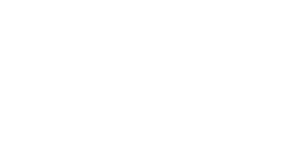

In [104]:
new_cassava['month'].value_counts().plot(kind='line', subplots=True, figsize=(8, 8)); plt.legend(loc='best')

In [ ]:
new_cassava['month'].value_counts(normalize=True).sort_values()

In [ ]:
#summary statistics for image classes shows how many crops were suffering from a certain disease.
new_cassava['CASSAVA_IMAGE_CLASS'].value_counts()

In [ ]:
#number of valid and invalid images captured by the users
new_cassava['IS_COMPLETE'].value_counts()

In [ ]:
#number of times each comment appeared
new_cassava['CASSAVA_DATA_COMMENT'].value_counts()

In [ ]:
cassava.IS_COMPLETE.mean()

In [ ]:
new_cassava.groupby('month').IS_COMPLETE.mean()

In [100]:
new_cassava.groupby('month').IS_COMPLETE.mean().plot(kind='barh', subplots=True, figsize=(8, 8)); plt.legend(loc='best')

In [ ]:
new_cassava.columns

In [102]:
new_cassava.groupby(new_cassava.SUBMISSION_DATE.dt.time).IS_COMPLETE.mean().plot(kind='barh', subplots=True, figsize=(8, 8)); plt.legend(loc='best')

In [ ]:
#How much of each kind of imgae class was submitted?
new_cassava['CASSAVA_IMAGE_CLASS'].value_counts().sort_values()

In [36]:
new_cassava['CASSAVA_IMAGE_CLASS'].value_counts().sort_values().plot(kind='barh', subplots=True, figsize=(8, 8)); plt.legend(loc='best')

In [ ]:
new_cassava['CASSAVA_DATA_COMMENT'].value_counts().sort_values()

In [103]:
new_cassava['CASSAVA_DATA_COMMENT'].value_counts().sort_values().plot(kind='barh', subplots=True, figsize=(8, 8)); plt.legend(loc='best')

# Dealing with image data

In [ ]:
cassava.iloc[:,[0,7,11,21]]

In [ ]:
new_cassava_valid = new_cassava[new_cassava['IS_COMPLETE'] == 1]
new_cassava_valid

In [ ]:
new_cassava_invalid = new_cassava[new_cassava['IS_COMPLETE'] == 0]
new_cassava_invalid

# GPS Data

In [ ]:
!pip install gmaps


In [ ]:
import urllib.parse
import requests
import gmaps
import config


In [ ]:
from config import gkey

In [ ]:
baseURL = "https://maps.googleapis.com/maps/api/geocode/json?latlng="
key = "&key=" + gkey

In [ ]:
#using fermented stringing
url = f"{baseURL}40.714224,-73.961452{key}"
print(url)

In [ ]:
requests.get(url).json()["results"][0]["geometry"]["location"]

In [ ]:
!pip install geopy

In [ ]:
from geopy import Nominatim

In [ ]:
coord = (0.424174,32.598598)

In [ ]:
cassava['CASSAVA_GPS_LAT']

In [ ]:
#To get the location of a single pair of coordinates
geolocator = Nominatim(user_agent = 'test/1')
location = geolocator.reverse('0.424174,32.598598')
print(location)

In [ ]:
from geopy.point import Point

In [ ]:
for feature in cassava:
    coords = feature['CASSAVA_GPS_LAT']['CASSAVA_GPS_LNG']  # here is the x, y pair of coordinates
    location = geolocator.reverse(coords)
    print(location.address)

In [ ]:
coord = (cassava['CASSAVA_GPS_LNG'], cassava['CASSAVA_GPS_LAT'])

In [ ]:
#cassava = pd.DataFrame([[0.424174, 32.598598]], columns=["CASSAVA_GPS_LAT", "CASSAVA_GPS_LNG"])
#cassava["ZipCode"] = cassava.apply(lambda x:geolocator.reverse(str(x["CASSAVA_GPS_LAT"])+", "+str(x["CASSAVA_GPS_LNG"])).address.split(",")[-2], axis=1)
#cassava.head()

In [ ]:
#zipcode = "7112"
#location = geolocator.geocode(zipcode)
#print("Zipcode:",zipcode)
#print("Details of the Zipcode:")
#print(location)

In [ ]:
!pip install reverse_geocoder
!pip install pprint

In [ ]:
cassava.columns

In [ ]:
cassava.iloc[:,[18,17]]

In [ ]:
import reverse_geocoder as rg
import pprint
 
def reverseGeocode(coordinates):
    result = rg.search(coordinates)
     
    # result is a list containing ordered dictionary.
    pprint.pprint(result)
 
# Driver function
if __name__=="__main__":
     
    # Coordinates tuple.Can contain more than one pair.
    coordinates =[(0.424174,32.598598), (0.521737,32.624897), (0.521473,32.625339),
                  (0.521453,32.625272), (0.521361,32.625380), (2.027965,33.644783)]
     
    reverseGeocode(coordinates)

In [108]:
cassava.isnull().sum()

ID                                   0
CREATOR_USER_ID                      0
CREATION_DATE                        0
LAST_UPDATE_USER_ID             133711
LAST_UPDATE_DATE                     0
MODEL_VERSION                   135607
UI_VERSION                      135607
IS_COMPLETE                          0
SUBMISSION_DATE                      0
MARKED_AS_COMPLETE_DATE          35700
CASSAVA_DATA_END_TIME                2
CASSAVA_IMAGE_CLASS                  0
META_INSTANCE_ID                     0
CASSAVA_DATA_START_TIME              0
CASSAVA_DATA_COMMENT             62919
CASSAVA_GPS_ALT                      2
CASSAVA_DEVICE_ID                    0
CASSAVA_GPS_LNG                      2
CASSAVA_GPS_LAT                      2
CASSAVA_DATA_SUBMISSION_TIME         0
CASSAVA_GPS_ACC                      2
CASSAVA_IMAGE_LINK                   0
dtype: int64

In [109]:
cassava.shape

(135607, 22)